Nama : Irfan Zulkarnaen<br>
NIM  : 231352002<br>
Kelas : Malam A<br>

- Import Dataset di Kaggle

In [56]:
import os
import json

kaggle_json = {
    "username": "jadoeltea",
    "key": "e4829efe858500918d02c29ecf585080"
}

kaggle_dir = '/root/.kaggle'
kaggle_file = 'kaggle.json'
kaggle_path = os.path.join(kaggle_dir, kaggle_file)

if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)


with open(kaggle_path, 'w') as file:
    json.dump(kaggle_json, file)

os.chmod(kaggle_path, 0o600)



In [57]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets download -d mansoordaku/ckdisease

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


'ls' is not recognized as an internal or external command,
operable program or batch file.
'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [58]:
!unzip ckdisease.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


- Import Library

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pickle


- Data Discovery

In [60]:
data = pd.read_csv('kidney_disease.csv')
data.sample()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
225,225,60.0,90.0,1.01,3.0,5.0,abnormal,normal,notpresent,present,...,35,12000,4.5,yes,yes,no,good,no,no,ckd


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [62]:
data = data.drop(['id'], axis=1)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [64]:
numerical = []
catgcols = []

for col in data.columns:
  if data[col].dtype=="float64":
    numerical.append(col)
  else:
      catgcols.append(col)

for col in data.columns:
     if col in numerical:
        data[col].fillna(data[col].median(), inplace=True)
     else:
        data[col].fillna(data[col].mode()[0], inplace=True)

In [65]:
numerical

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [66]:
catgcols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

- Explorary Data Analisis (EDA)

In [67]:
fig = px.scatter(data,
    x = data['age'], y = data['dm'],
    color="classification")
fig.update_layout(title='Pola Sebaran Penderita Penyakit Ginjal Kronis (CKD) Berdasarkan Usia Dengan Diabetes Melitus (DM)')
fig.show()



In [68]:
fig = px.scatter(data,
    x = data['age'], y = data['htn'],
    color="classification")
fig.update_layout(title='Pola Sebaran Penderita Penyakit Ginjal Kronis (CKD) Berdasarkan Usia Dengan Hypertensiom (htn)')
fig.show()


In [69]:
fig = px.scatter(data,
    x = data['age'], y = data['ane'],
    color="classification")
fig.update_layout(title='Pola Sebaran Penderita Penyakit Ginjal Kronis (CKD) Berdasarkan Usia Dengan Anemia (ane)')
fig.show()

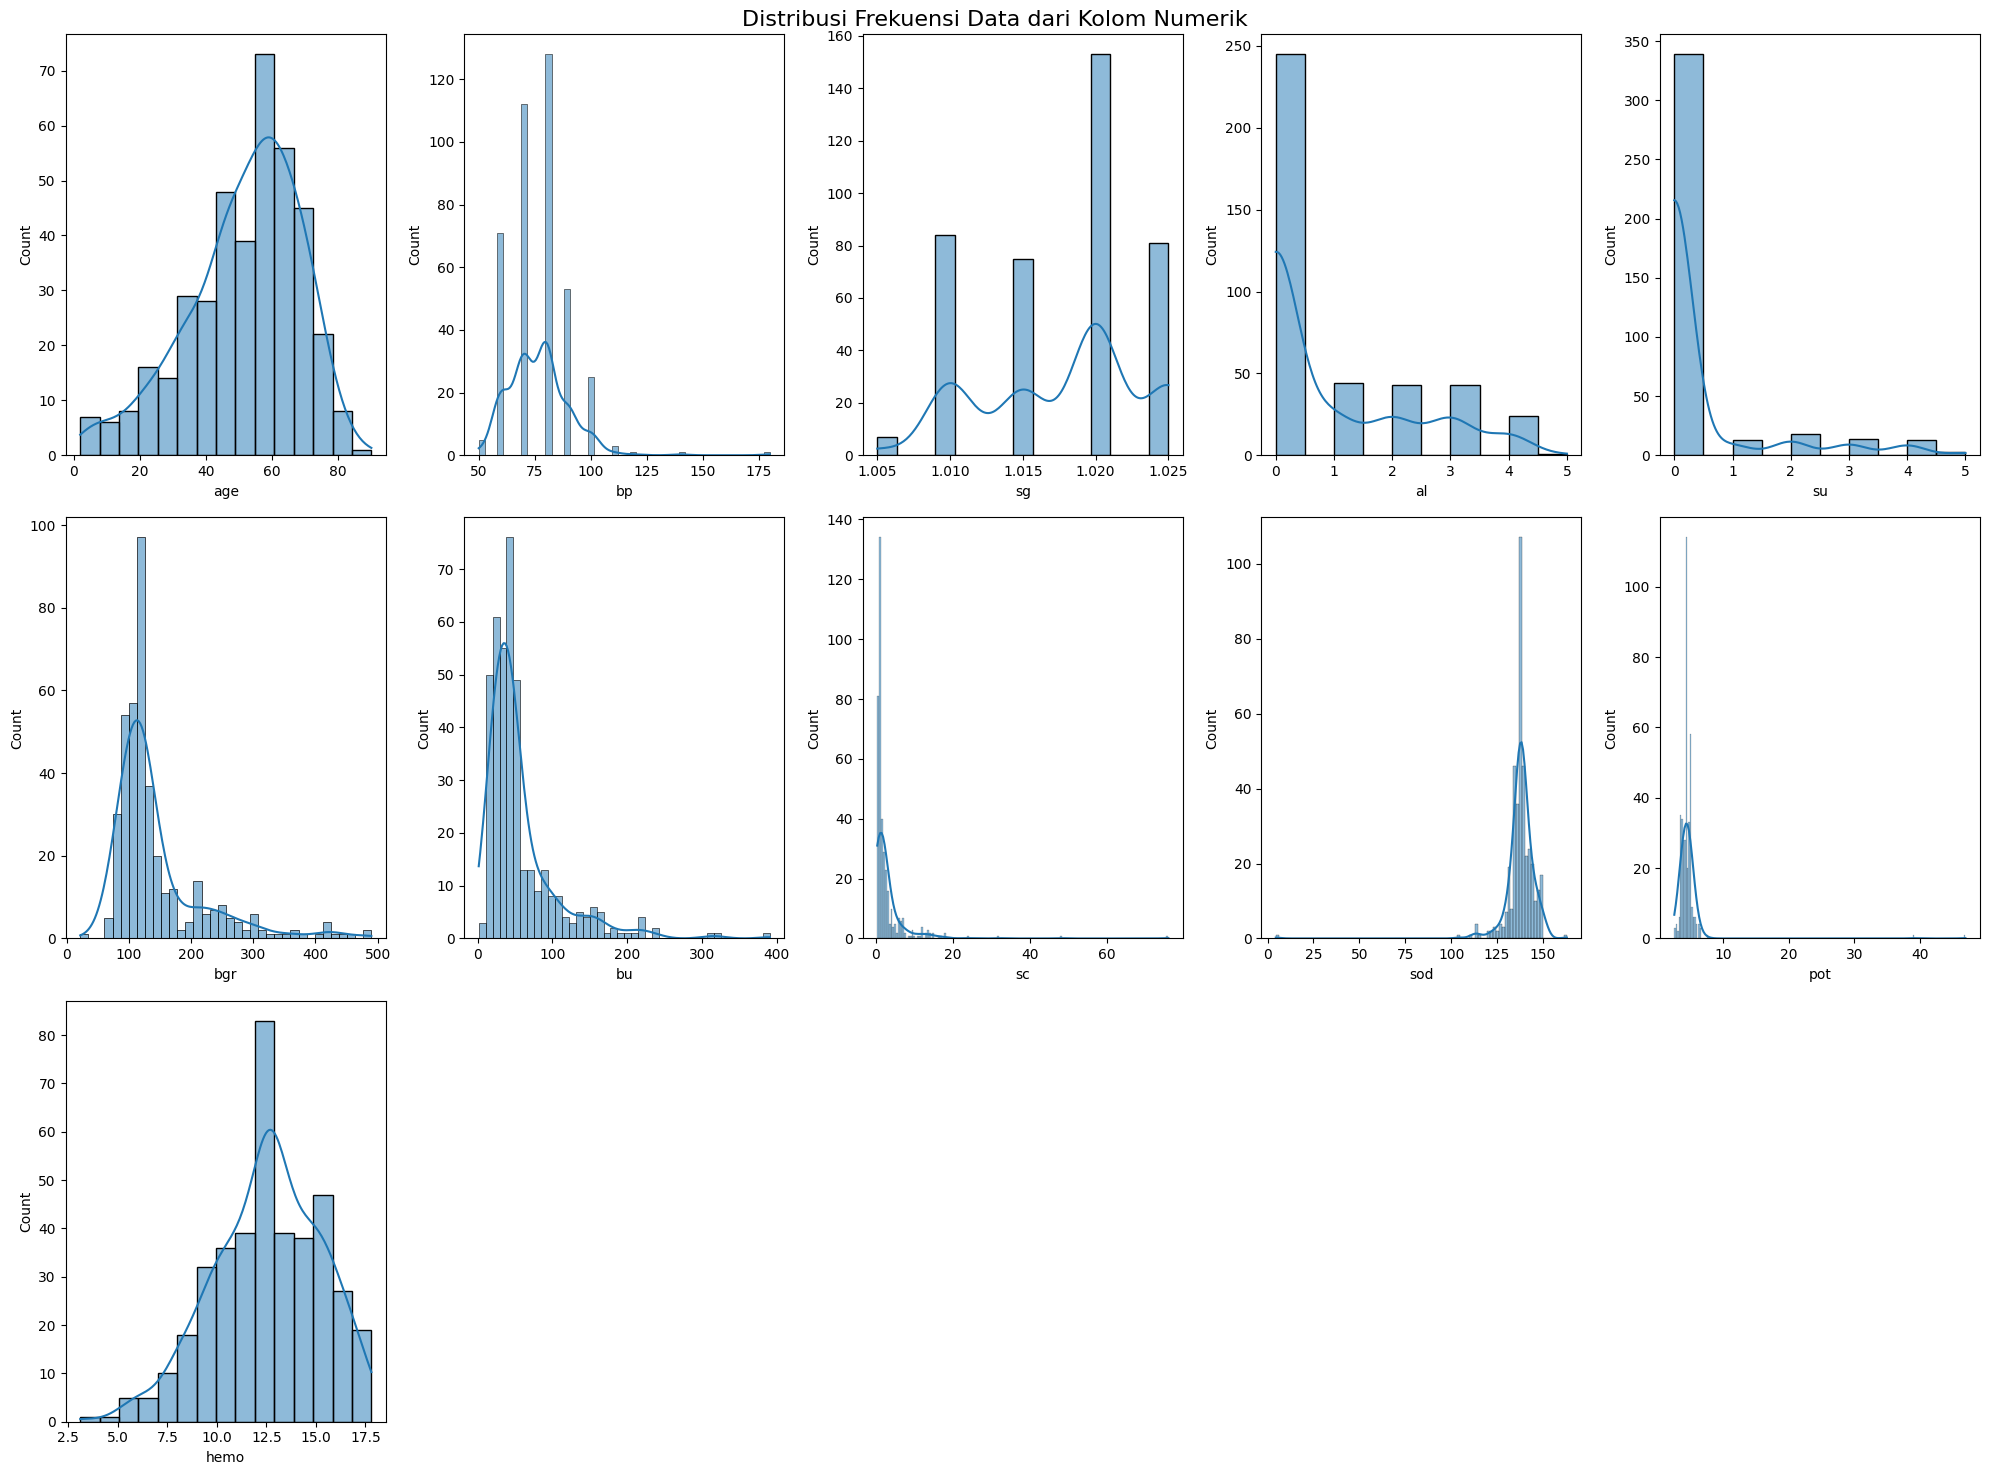

In [70]:
#distribusi frekuensi dari kolom numerik
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in numerical:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column)

    plotnumber += 1
plt.suptitle('Distribusi Frekuensi Data dari Kolom Numerik', fontsize=16)
plt.tight_layout()
plt.show()

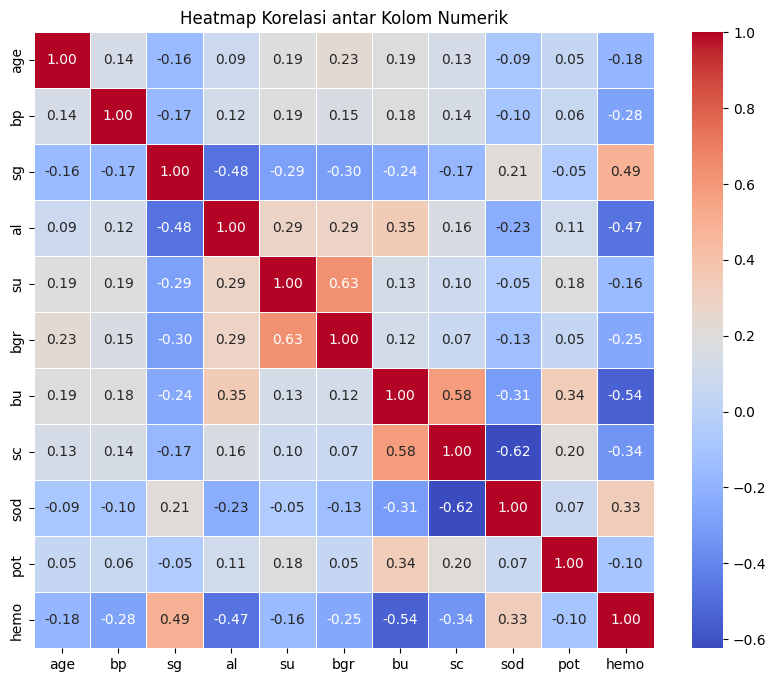

In [71]:
numeric_columns = data.select_dtypes(include=['float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom Numerik')
plt.show()


C:\Users\jadoel\AppData\Local\Temp\ipykernel_11724\3201566130.py:9: UserWarning:

Glyph 9 (	) missing from current font.

C:\Users\jadoel\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9 (	) missing from current font.



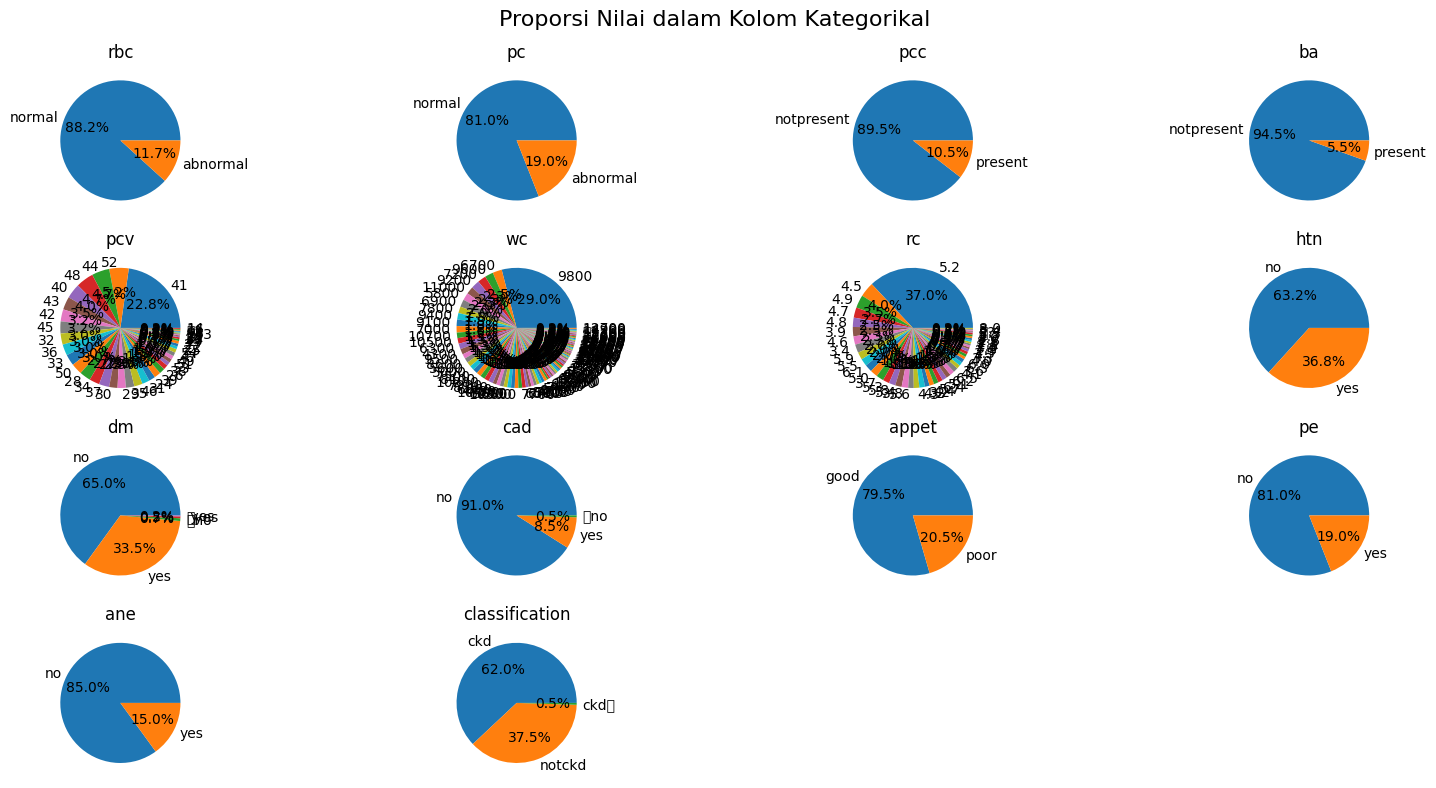

In [72]:
plt.figure(figsize=(16, 8))

for i, column in enumerate(catgcols, 1):
    plt.subplot(4, 4, i)
    value_counts = data[column].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(column)
plt.suptitle('Proporsi Nilai dalam Kolom Kategorikal', fontsize=16)
plt.tight_layout()
plt.show()

- Data Preprocesing

In [73]:
data['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [74]:
data['classification'] =data ['classification'].replace(['ckd\t'],'ckd')

In [75]:
data['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [76]:
#memisahkan features dan label
ind_col = [col for col in data.columns if col != 'classification']
dep_col = 'classification'

In [77]:
data[dep_col].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [78]:
#merubah dataset semua menjadi numerikal
le = LabelEncoder()
for col in catgcols:
  data[col] = le.fit_transform(data[col])

In [79]:
data['classification'] = le.fit_transform(data['classification'])

In [80]:
#identifikasi data label dan features
x = data[ind_col]
y = data[dep_col]

In [81]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,34,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,34,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,34,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,19,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,27,0,3,1,0,0,0,0


In [82]:
data.to_csv('kidney-disease.csv',index=False)

- Modelling

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [84]:
dtc = DecisionTreeClassifier (
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
    )

model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}")
confusion = confusion_matrix (y_test, dtc.predict(x_test))

tn, fp, fn, tp = confusion.ravel()
print (f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.99375
akurasi data testing = 1.0 

confusion matrix : 
[[52  0]
 [ 0 28]]
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



- Visualisasi hasil Algoritma ID3 / Pohon Keputusan

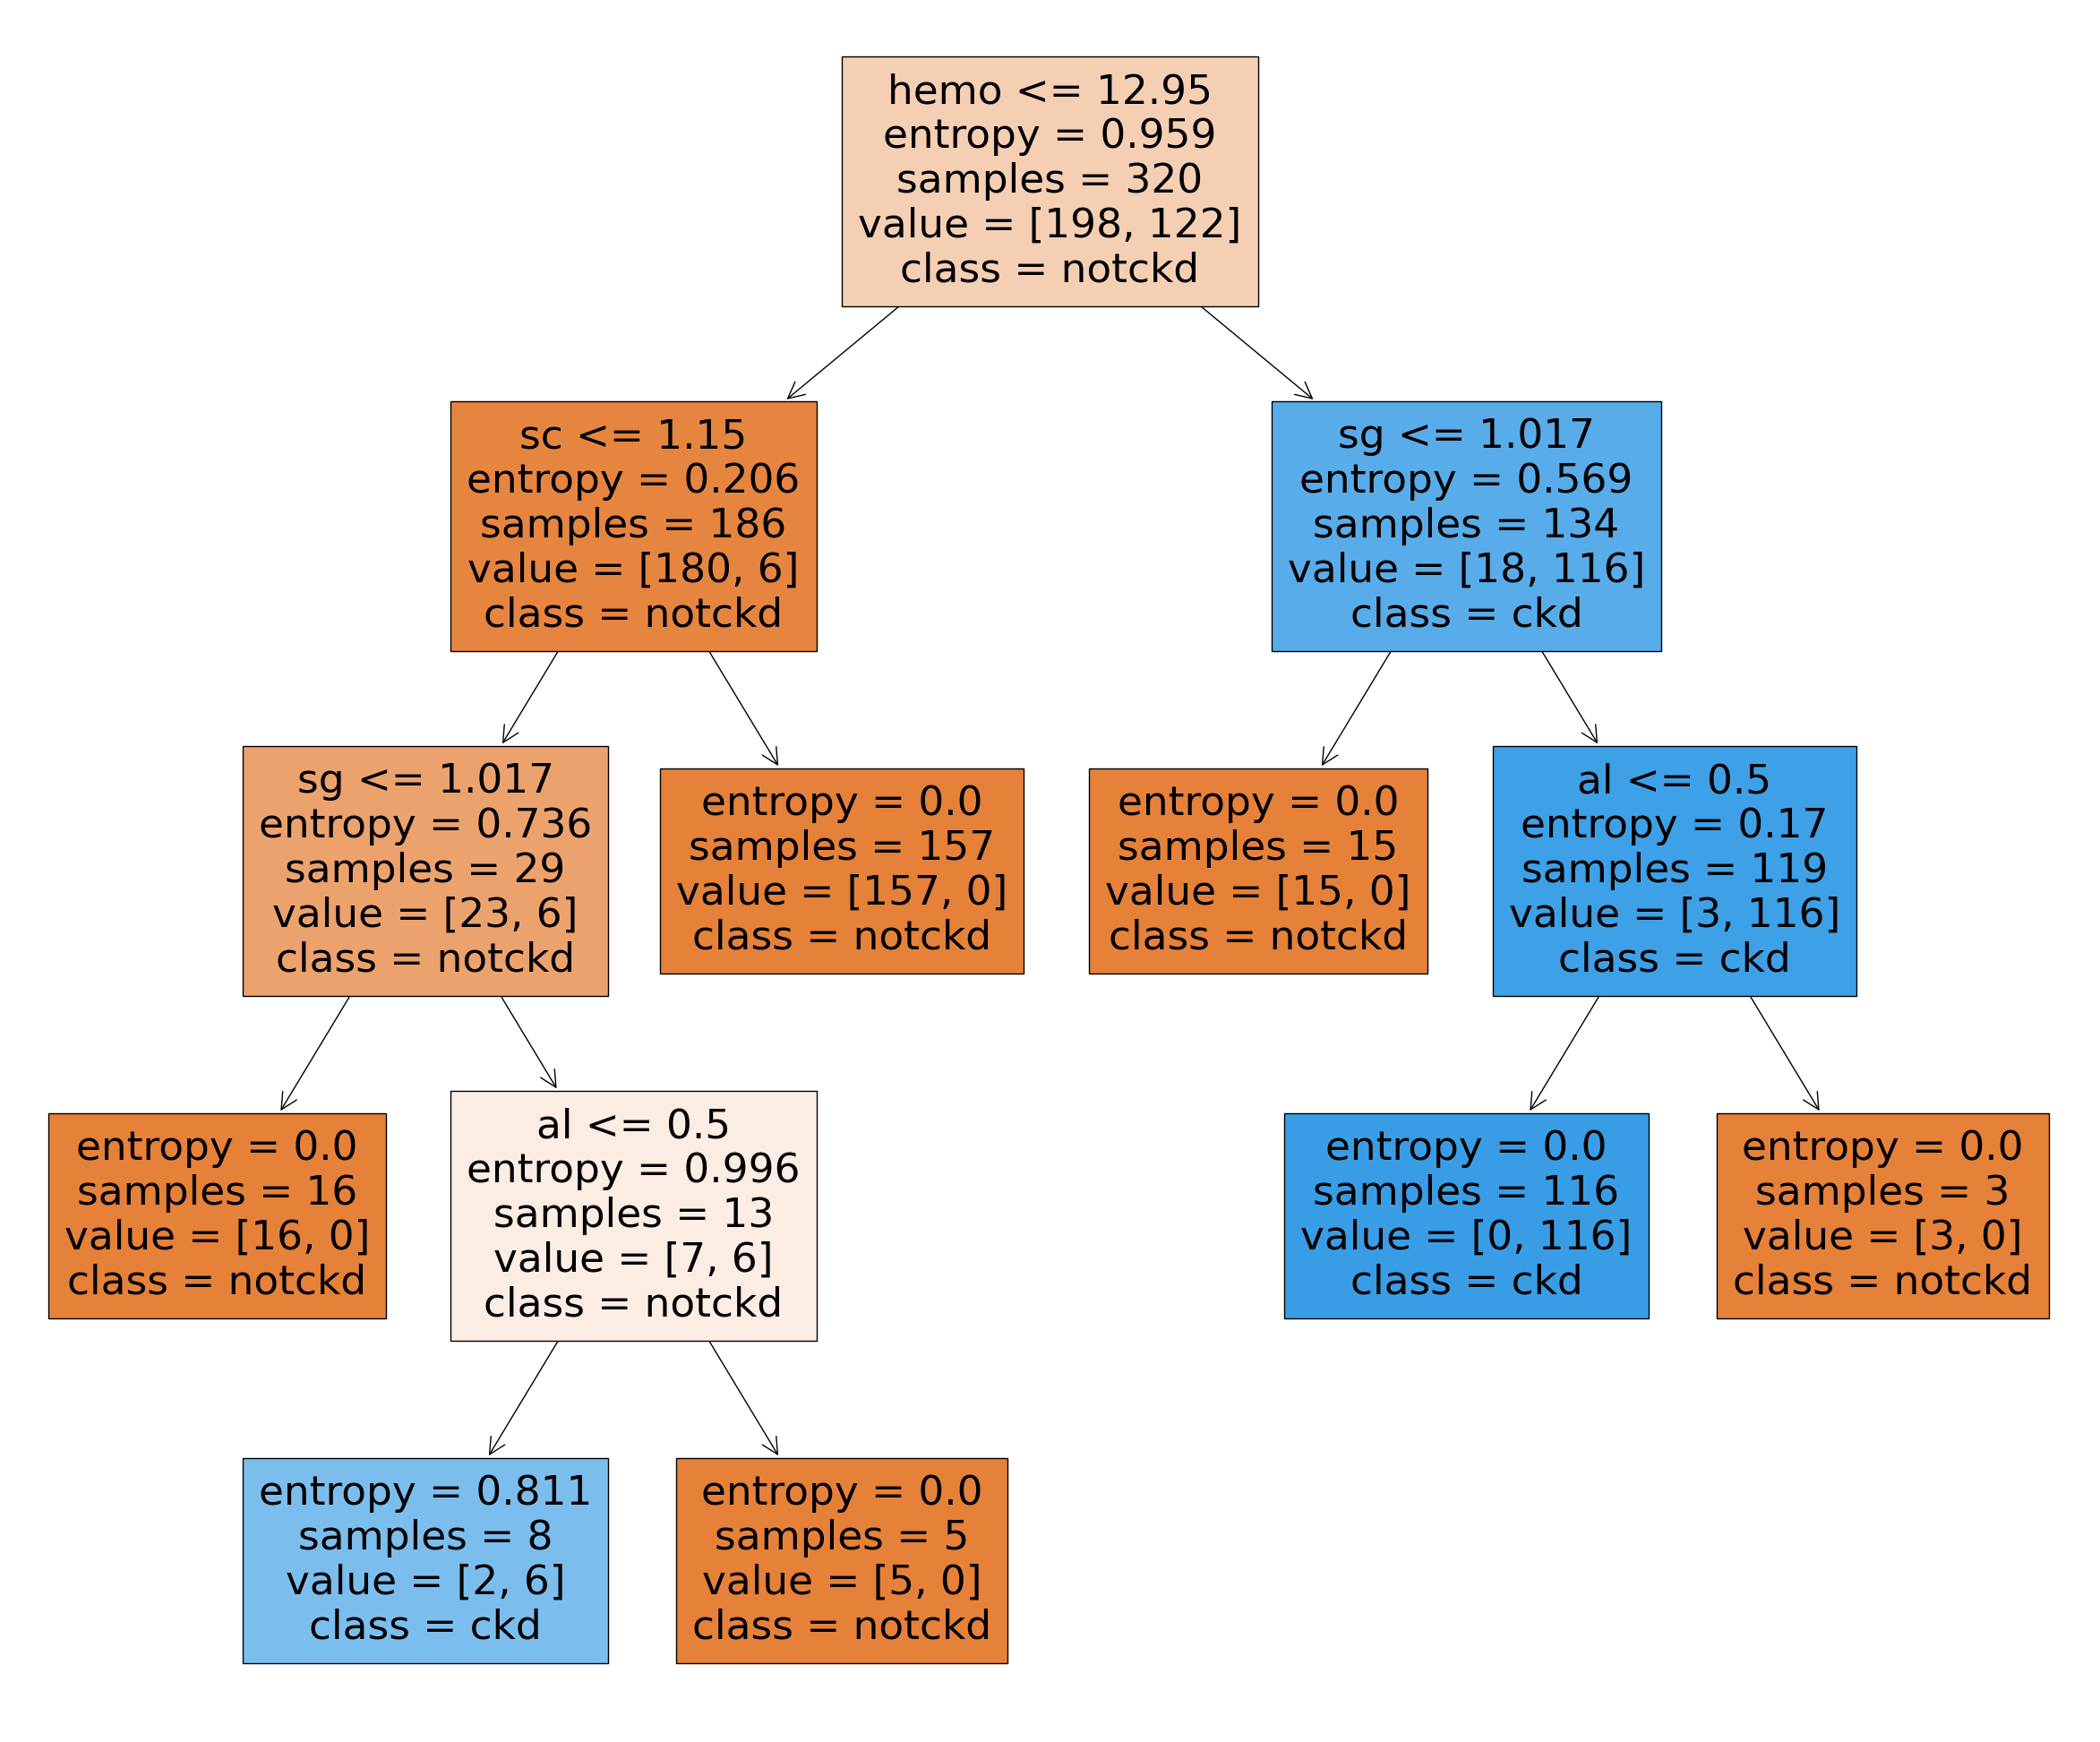

In [85]:
fig = plt.figure(figsize=(30,25))
_= tree.plot_tree(model,
                 feature_names=ind_col,
                 class_names=['notckd','ckd'],
                 filled=True)

In [86]:
input_data = (68.0,70.0,1.005,1.0,0.0,0,0,1,0,121.0,28.0,1.4,138.0,4.4,12.9,26,90,34,0,3, 2, 0, 0,0)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Melakukan prediksi dengan model yang sudah diinisiasi sebelumnya
prediction = model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 0:
    print('Pasien Tidak Terkena Batu Ginjal')
else:
    print('Pasien Terkena Batu Ginjal')


[0]
Pasien Tidak Terkena Batu Ginjal


c:\Users\jadoel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



- Simpan Model

In [87]:
filename = 'kidney-disease.sav'
pickle.dump(dtc, open(filename,'wb'))